<a href="https://colab.research.google.com/github/AnaRaquelCafe/Evasao-Estudantes/blob/main/Predi%C3%A7%C3%A3o_de_evas%C3%A3o_de_estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predizendo a evasão de estudantes e sucesso acadêmico** 🎓

**Sobre a base de dados:** 🎲

Um conjunto de dados criado a partir de uma instituição de ensino superior (adquirido de várias bases de dados disjuntas) relacionado a alunos matriculados em diferentes cursos de graduação, como agronomia, design, educação, enfermagem, jornalismo, administração, serviço social e tecnologias.

O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno (percurso acadêmico, demografia e fatores socioeconômicos) e o desempenho acadêmico do aluno no final do primeiro e segundo semestres. Os dados são usados ​​para construir **modelos de classificação para prever a evasão e o sucesso acadêmico dos alunos**. O problema é formulado como uma tarefa de classificação de três categorias, na qual há um forte desequilíbrio em relação a uma das classes.

**Para qual finalidade o conjunto de dados foi criado?** 🎯

O conjunto de dados foi criado no âmbito de um projeto que visa contribuir para a redução do abandono e insucesso académico no ensino superior, através da utilização de técnicas de aprendizagem automática para identificar alunos em risco numa fase inicial do seu percurso académico, de modo a que estratégias de apoio aos mesmos possam ser postas em prática. O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno, trajetória acadêmica, demografia e fatores socioeconômicos. O problema é formulado como uma tarefa de classificação de três categorias (abandono, matriculado e graduado) ao final da duração normal do curso.

**Sobre a fonte de dados:**

Este conjunto de dados é apoiado pelo programa SATDAP - Capacitação da Administração Pública ao abrigo da bolsa POCI-05-5762-FSE-000191, Portugal.

# **Analisando a qualidade dos dados 🧹🎲**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [21]:
pd.set_option('display.max_columns', None) # Para mostrar todas as colunas

# Carrega o arquivo Excel em um DataFrame do Pandas
df = pd.read_excel("StudentsPrepared.xlsx")

# Exibe os primeiros registros do DataFrame
df.head()


,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
0,Solteiro,Design de Animação e Multimédia,Ensino Secundário,122.0,Português,127.3,0,0,1,Masculino,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
1,Solteiro,Turismo,Ensino Secundário,160.0,Português,142.5,0,0,0,Masculino,0,0,0,6,6,6,1.400000e+01,0,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduado
2,Solteiro,Design de Comunicação,Ensino Secundário,122.0,Português,124.8,0,0,0,Masculino,0,0,0,6,0,0,0.000000e+00,0,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
3,Solteiro,Jornalismo e Comunicação,Ensino Secundário,122.0,Português,119.6,0,0,1,Feminino,0,0,0,6,8,6,1.342857e+16,0,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduado
4,Casado,Serviço Social (prestação nocturna),Ensino Secundário,100.0,Português,141.5,0,0,1,Feminino,0,0,0,6,9,5,1.233333e+16,0,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduado


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   EstadoCivil                                 4424 non-null   object 
 1   Curso                                       4424 non-null   object 
 2   QualificacaoAnterior                        4424 non-null   object 
 3   QualificacaoAnteriorGrau                    4424 non-null   float64
 4   Nacionalidade                               4424 non-null   object 
 5   NotaAdmissao                                4424 non-null   float64
 6   NecessidadesEspeciais                       4424 non-null   int64  
 7   Devedor                                     4424 non-null   int64  
 8   MensalidadesEmDia                           4424 non-null   int64  
 9   Genero                                      4424 non-null   object 
 10  Bolsista    

In [24]:
df.isnull().sum() #verificando valoresm nulos

EstadoCivil                                   0
Curso                                         0
QualificacaoAnterior                          0
QualificacaoAnteriorGrau                      0
Nacionalidade                                 0
NotaAdmissao                                  0
NecessidadesEspeciais                         0
Devedor                                       0
MensalidadesEmDia                             0
Genero                                        0
Bolsista                                      0
International                                 0
UnidadesCurriculares1SemestreCreditado        0
UnidadesCurriculares1SemestreInscrito         0
UnidadesCurriculares1SemestreAvaliacoes       0
UnidadesCurriculares1SemestreAprovado         0
UnidadesCurriculares1SemestreGrau             0
UnidadesCurriculares1SemestreSemAvaliacoes    0
UnidadesCurriculares2SemestreCreditado        0
UnidadesCurriculares2SemestreInscrito         0
UnidadesCurriculares2SemestreAvaliacoes 

In [25]:
df.shape

(4424, 28)

# **Conhecendo os dados** 👋

Um passo muito importante no pipeline da construção de um modelo de aprendizado de máquina é conhecer os dados.

**Como conhecemos os dados?**

Claro que a análise exploratória dos dados pode ser uma ótima primeira largada! Nesta etapa **construímos gráficos**, **testamos hipóteses** e **validamos os dados** com a área de negócio.

**Entendendo a target**



---



In [26]:
set(df['Target'])

{'Desistente', 'Graduado', 'Matriculado'}

Próximo passo, vamos entender o **equilíbrio da base de dados**.



---


Quando estamos construindo um modelo de aprendizado de máquina, a análise do equilíbrio de classes é muito importante para manter as amostras de cada target de forma **representativa** durante o treinamento dos dados, ou seja, devemos garantir que cada tipo de categoria da variável target tenha a mesma representatividade em volume de dados durante o treinamento do algoritmo.

Vamos plotar um gráfico de barras para entender as proporções:

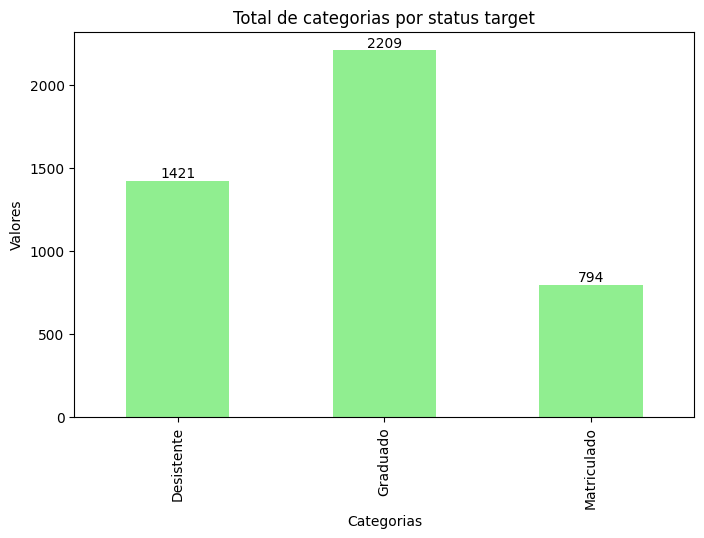

In [27]:
# Criando o gráfico de volume de dados por categoria da target

plt.figure(figsize=(8, 5))
df_targets = df.groupby('Target')['Target'].count()
df_targets.plot(kind='bar', color='lightgreen')

# Adicionar rótulos nas barras
for i, df_targets in enumerate(df_targets):
    plt.text(i, df_targets + 1, str(df_targets), ha='center', va='bottom')

# Configurar título e rótulos dos eixos
plt.title('Total de categorias por status target')
plt.xlabel('Categorias')
plt.ylabel('Valores')

# Exibir o gráfico
plt.show()


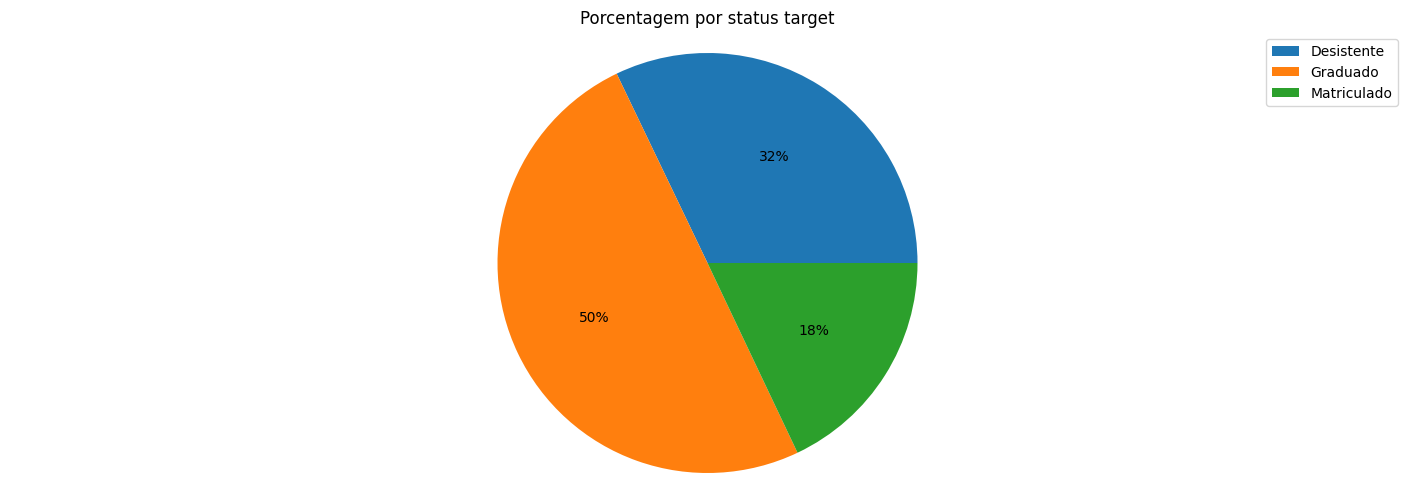

In [28]:
#Calcular o total de alunos(as) por tipo de status
df_targets_percent = df.groupby('Target')['Target'].count()

# Calculando a proporção de estudantes por categporia
total_estudantes = len(df)
df_target_porcentagem = df_targets_percent / total_estudantes * 100

#Separando os valores e nomes em uma lista, para deixar o gráfico mais apresentável
labels = df_target_porcentagem.index.tolist()
sizes = df_target_porcentagem.values.tolist()

#Criando o gráfico
figura, grafico = plt.subplots(figsize=(18, 6))
grafico.pie(sizes, autopct='%1.0f%%')
grafico.axis('equal')
plt.title('Porcentagem por status target')
plt.legend(labels, loc='best')
plt.show()

OK, podemos concluir aqui que 50% da base contém estudantes graduados e 32% de estudantes evadidos, os demais 18% são estudantes ainda matriculados e ativos.

**Explorando dados demográficos**

In [29]:
df['EstadoCivil'].value_counts(normalize = True)*100

Solteiro                  88.584991
Casado                     8.566908
Divorciado                 2.056962
União de Fato              0.565099
Separado Judicialmente     0.135624
Viúvo                      0.090416
Name: EstadoCivil, dtype: float64

In [30]:
df['Nacionalidade'].value_counts(normalize = True)*100

Português                  97.513562
Brasileiro                  0.858951
Santomense                  0.316456
Cabo-verdiano               0.293852
Espanhol                    0.293852
Guineense                   0.113020
Moldávia (República da)     0.067812
Italiano                    0.067812
Ucraniano                   0.067812
Angolano                    0.045208
Mexicano                    0.045208
Romeno                      0.045208
Moçambicano                 0.045208
Alemão                      0.045208
Russo                       0.045208
Turco                       0.022604
Holandês                    0.022604
Colombiano                  0.022604
Cubano                      0.022604
Inglês                      0.022604
Lituano                     0.022604
Name: Nacionalidade, dtype: float64

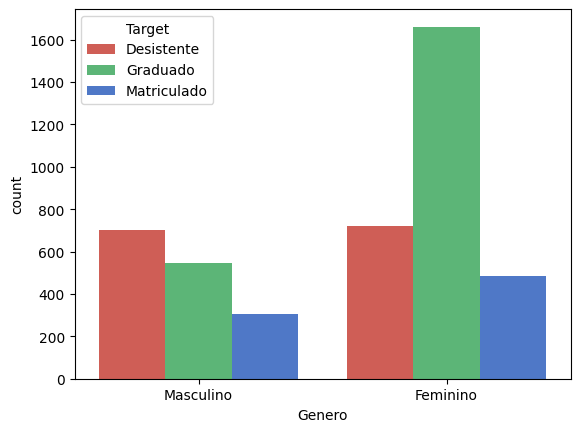

In [31]:
color_dict = {'Desistente': '#e34c42','Graduado': '#4dc471', 'Matriculado': '#3b71db'}

# Definindo a paleta de cores
sns.set_palette(list(color_dict.values()))

sns.countplot(x='Genero', hue='Target', data=df)
plt.show()


In [39]:
df['EstadoCivil'].value_counts(normalize = True)*100

Solteiro                  88.584991
Casado                     8.566908
Divorciado                 2.056962
União de Fato              0.565099
Separado Judicialmente     0.135624
Viúvo                      0.090416
Name: EstadoCivil, dtype: float64

In [32]:
df['Curso'].value_counts(normalize = True)*100

Enfermagem                                    17.314647
Gestão                                         8.589512
Serviço Social                                 8.024412
Enfermagem Veterinária                         7.617541
Jornalismo e Comunicação                       7.481917
Gestão de Publicidade e Marketing              6.057866
Gestão (presencial noturno)                    6.057866
Turismo                                        5.696203
Design de Comunicação                          5.108499
Design de Animação e Multimédia                4.859855
Serviço Social (prestação nocturna)            4.859855
Agronomia                                      4.746835
Ensino Básico                                  4.339964
Engenharia Informática                         3.842676
Equincultura                                   3.187161
Higiene Oral                                   1.943942
Tecnologias de Produção de Biocombustíveis     0.271248
Name: Curso, dtype: float64

**Entendendo os dados por perfil de estudantes: evadidos e formandos**

In [33]:
df_evadidos = df[df['Target'] == "Desistente"]
df_matriculados = df[df['Target'] == "Matriculado"]
df_graduados = df[df['Target'] == "Graduado"]

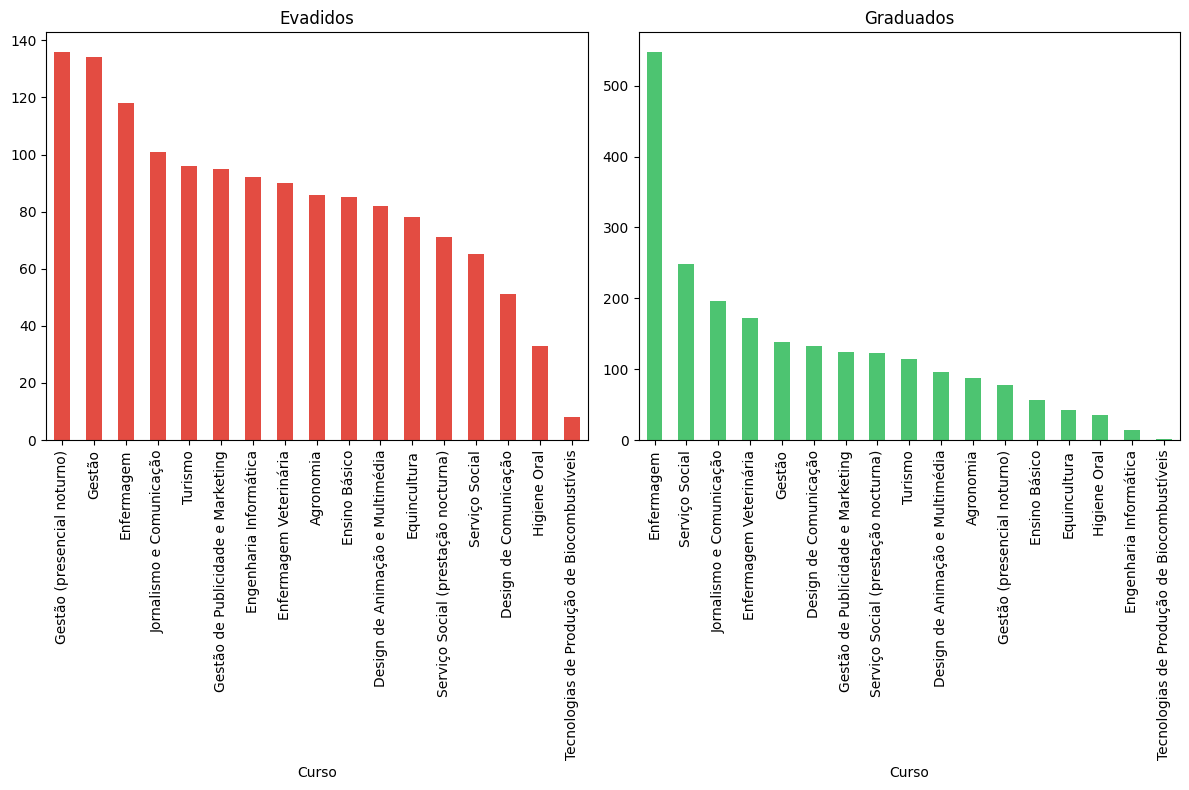

In [34]:
df_courses_evadidos = df_evadidos.groupby('Curso')['Curso'].count().sort_values(ascending=False)
df_courses_graduados = df_graduados.groupby('Curso')['Curso'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
df_courses_evadidos.plot(kind='bar', color='#e34c42', label= 'Evadidos')
plt.title('Evadidos')

plt.subplot(1, 2, 2)
df_courses_graduados.plot(kind='bar', color='#4dc471', label= 'Graduados')
plt.title('Graduados')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()





Analizando os resultados, temos mais graduados em Enfermagem e mais evadidos em Gestão (presencial noturno).

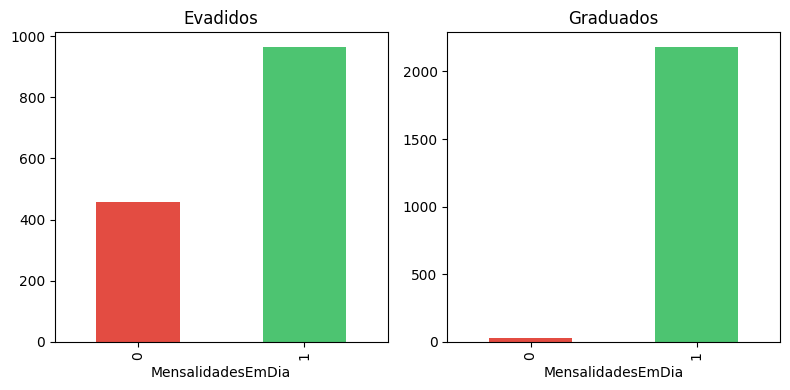

In [35]:
df_evadidos_MensalidadesEmDia = df_evadidos.groupby('MensalidadesEmDia')['MensalidadesEmDia'].count()
df_graduados_MensalidadesEmDia = df_graduados.groupby('MensalidadesEmDia')['MensalidadesEmDia'].count()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
df_evadidos_MensalidadesEmDia.plot(kind='bar', color=['#e34c42', '#4dc471'] , label= 'Evadidos')
plt.title('Evadidos')

plt.subplot(1, 2, 2)
df_graduados_MensalidadesEmDia.plot(kind='bar', color=['#e34c42', '#4dc471'], label= 'Graduados')
plt.title('Graduados')

plt.tight_layout()

plt.show()

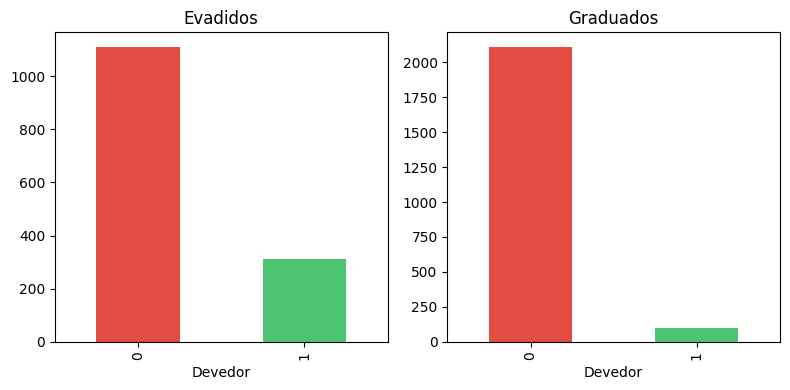

In [36]:
df_evadidos_Devedor = df_evadidos.groupby('Devedor')['Devedor'].count()
df_graduados_Devedor = df_graduados.groupby('Devedor')['Devedor'].count()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
df_evadidos_Devedor.plot(kind='bar',  color=['#e34c42', '#4dc471'], label= 'Evadidos')
plt.title('Evadidos')

plt.subplot(1, 2, 2)
df_graduados_Devedor.plot(kind='bar', color=['#e34c42', '#4dc471'], label= 'Graduados')
plt.title('Graduados')

plt.tight_layout()

plt.show()


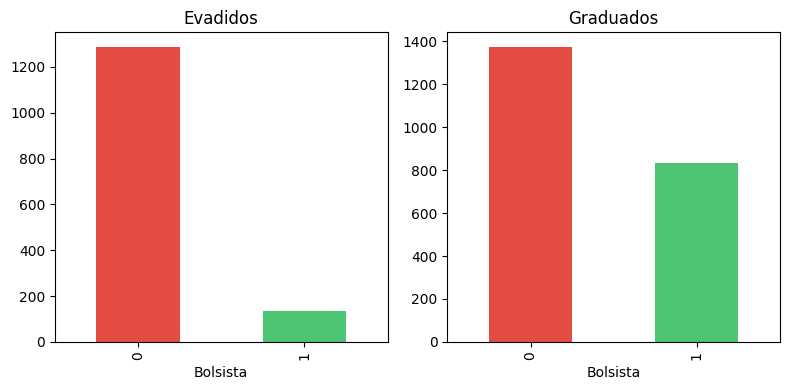

In [37]:
df_evadidos_Bolsista = df_evadidos.groupby('Bolsista')['Bolsista'].count()
df_graduados_Bolsista = df_graduados.groupby('Bolsista')['Bolsista'].count()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
df_evadidos_Bolsista.plot(kind='bar',label= 'Evadidos',  color=['#e34c42', '#4dc471'])
plt.title('Evadidos')

plt.subplot(1, 2, 2)
df_graduados_Bolsista.plot(kind='bar', label= 'Graduados', color=['#e34c42', '#4dc471'])
plt.title('Graduados')

plt.tight_layout()

plt.show()

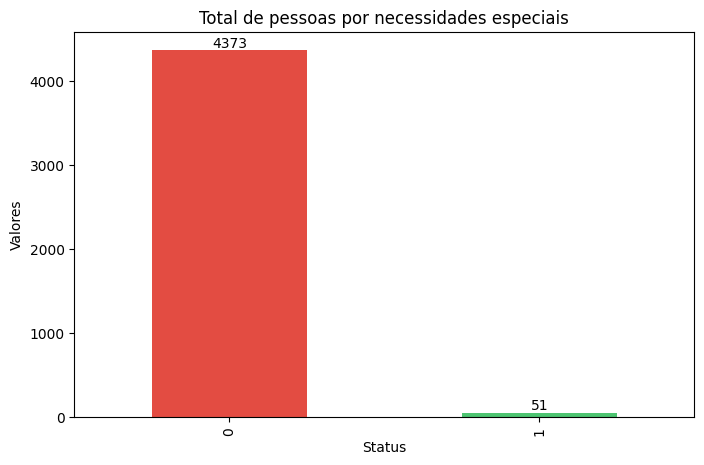

In [38]:
plt.figure(figsize=(8, 5))
df_NecessidadesEspeciais = df.groupby('NecessidadesEspeciais')['NecessidadesEspeciais'].count()
df_NecessidadesEspeciais.plot(kind='bar',  color=['#e34c42', '#4dc471'])

# Adicionar rótulos nas barras
for i, df_NecessidadesEspeciais in enumerate(df_NecessidadesEspeciais):
    plt.text(i, df_NecessidadesEspeciais + 1, str(df_NecessidadesEspeciais), ha='center', va='bottom')

# Configurar título e rótulos dos eixos
plt.title('Total de pessoas por necessidades especiais')
plt.xlabel('Status')
plt.ylabel('Valores')

# Exibir o gráfico
plt.show()


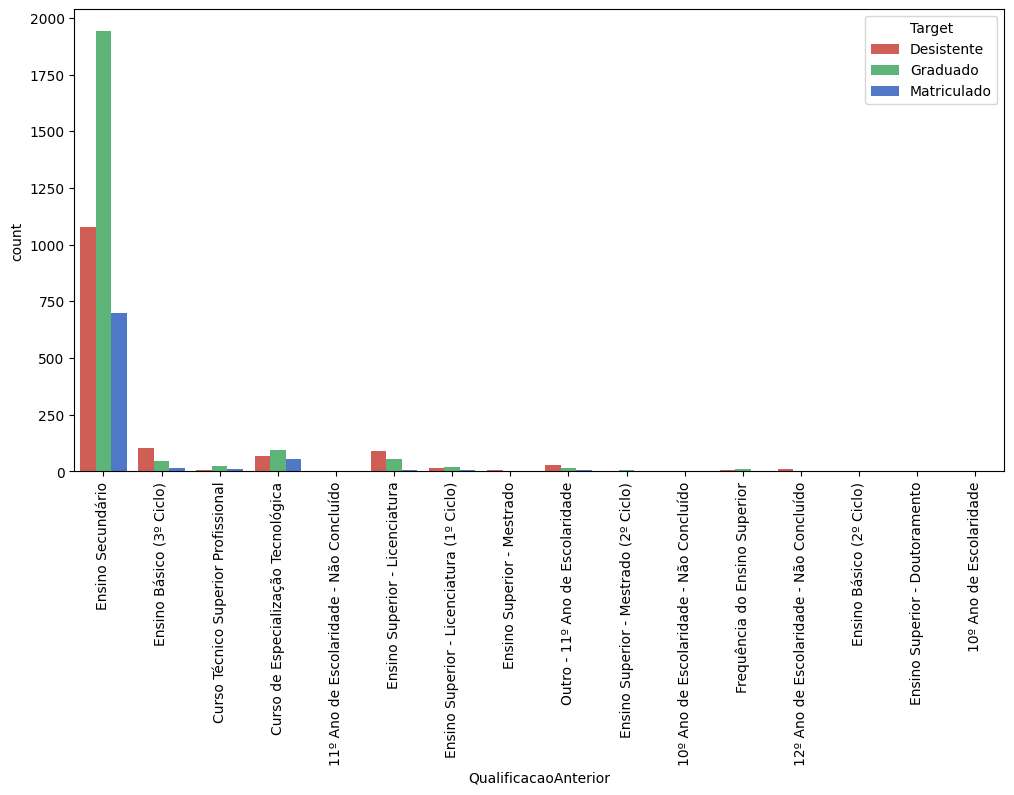

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='QualificacaoAnterior', hue='Target', data=df)
plt.xticks(rotation=90)
plt.show()


**Analisando fatores econômicos**

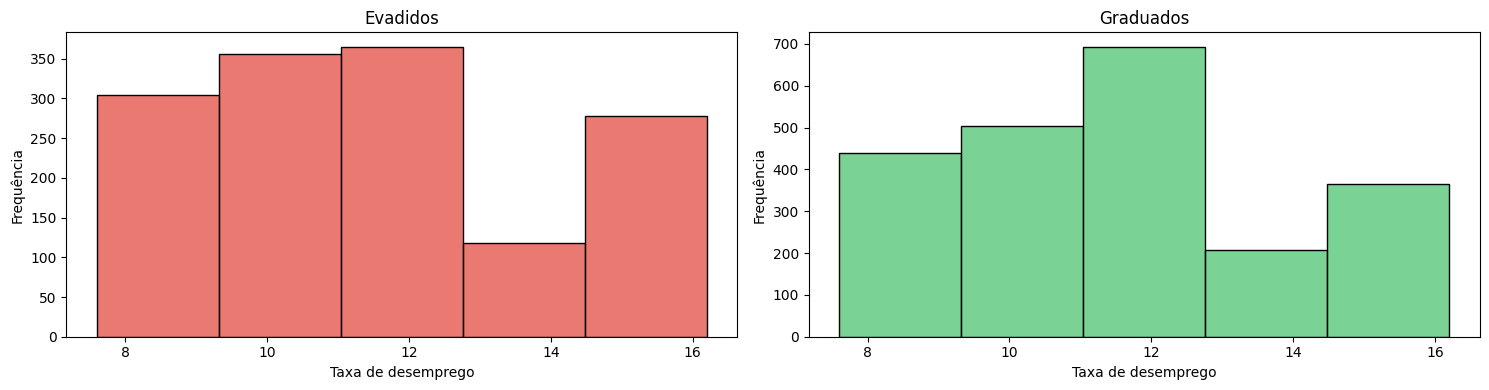

In [41]:
evadidos_TaxaDesemprego = df_evadidos['TaxaDesemprego']
graduados_TaxaDesemprego = df_graduados['TaxaDesemprego']


fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o primeiro gráfico
sns.histplot(data=evadidos_TaxaDesemprego, bins=5, ax=axes[0], color='#e34c42')
axes[0].set_title('Evadidos')
axes[0].set_xlabel('Taxa de desemprego')
axes[0].set_ylabel('Frequência')

#Criando o segundo gráfico
sns.histplot(data=graduados_TaxaDesemprego, bins=5, ax=axes[1], color='#4dc471')
axes[1].set_title('Graduados')
axes[1].set_xlabel('Taxa de desemprego')
axes[1].set_ylabel('Frequência')


fig.tight_layout()
plt.show()

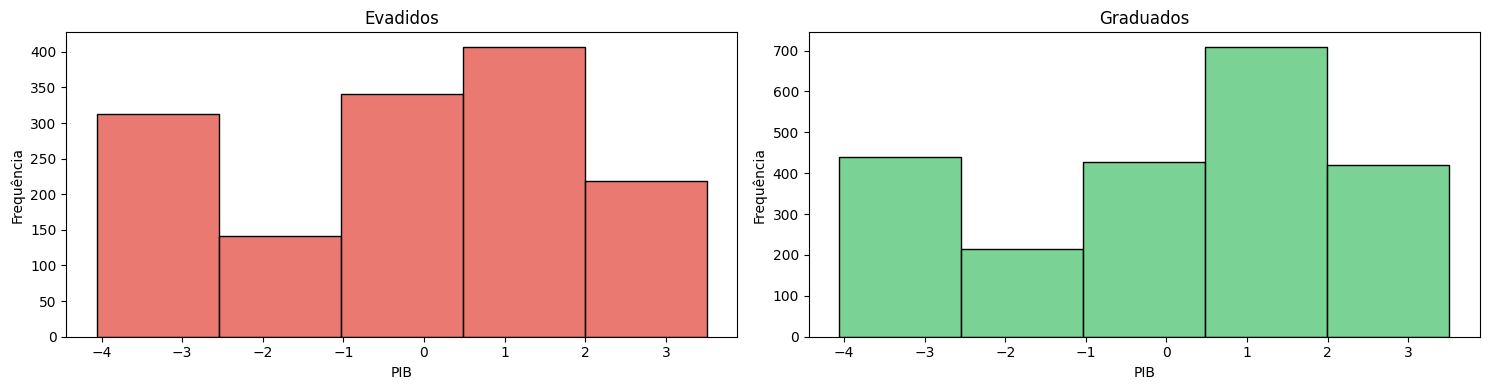

In [42]:
evadidos_PIB = df_evadidos['PIB']
graduados_PIB = df_graduados['PIB']


fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o primeiro gráfico
sns.histplot(data=evadidos_PIB, bins=5, ax=axes[0], color='#e34c42')
axes[0].set_title('Evadidos')
axes[0].set_xlabel('PIB')
axes[0].set_ylabel('Frequência')

#Criando o segundo gráfico
sns.histplot(data=graduados_PIB, bins=5, ax=axes[1], color='#4dc471')
axes[1].set_title('Graduados')
axes[1].set_xlabel('PIB')
axes[1].set_ylabel('Frequência')


fig.tight_layout()
plt.show()

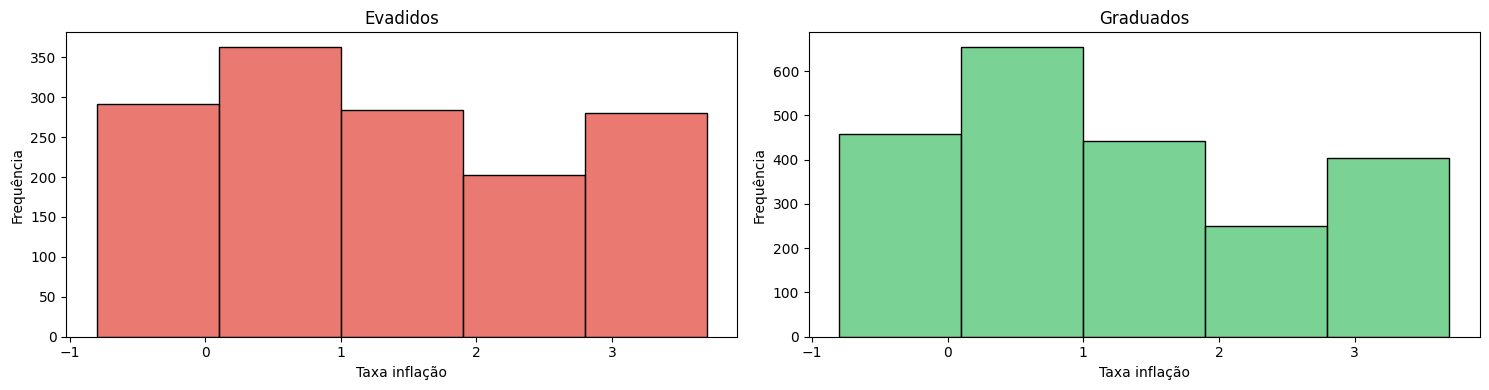

In [43]:
evadidos_TaxaInflacao = df_evadidos['TaxaInflacao']
graduados_TaxaInflacao = df_graduados['TaxaInflacao']


fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o primeiro gráfico
sns.histplot(data=evadidos_TaxaInflacao, bins=5, ax=axes[0], color='#e34c42')
axes[0].set_title('Evadidos')
axes[0].set_xlabel('Taxa inflação')
axes[0].set_ylabel('Frequência')

#Criando o segundo gráfico
sns.histplot(data=graduados_TaxaInflacao, bins=5, ax=axes[1], color='#4dc471')
axes[1].set_title('Graduados')
axes[1].set_xlabel('Taxa inflação')
axes[1].set_ylabel('Frequência')


fig.tight_layout()
plt.show()

**Analisando o desempenho acadêmico**

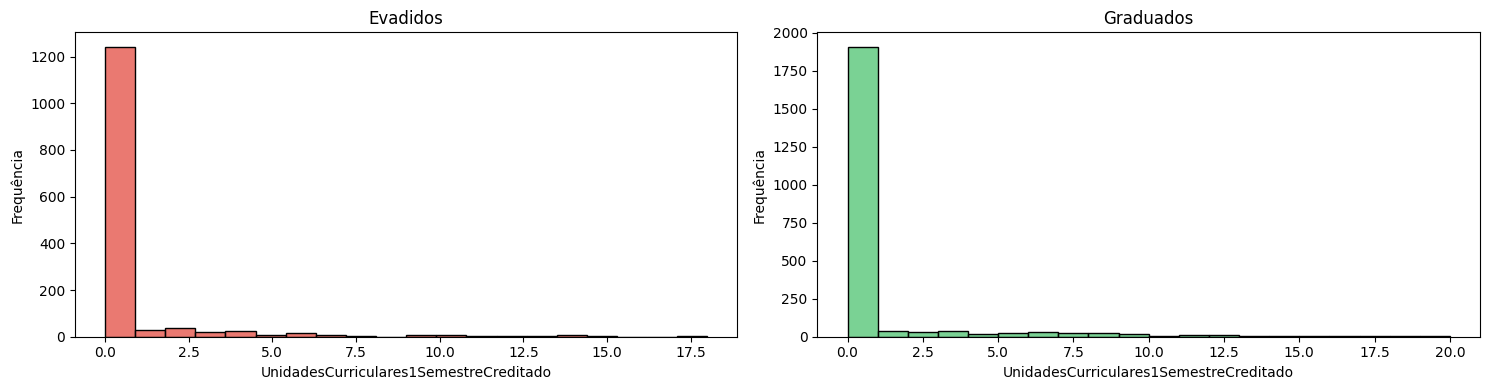

In [44]:
evadidos = df_evadidos['UnidadesCurriculares1SemestreCreditado']
graduados = df_graduados['UnidadesCurriculares1SemestreCreditado']

#Configurando para criar dois gráficos um do lado do outro.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o primeiro gráfico
sns.histplot(data=evadidos, bins=20, ax=axes[0], color='#e34c42')
axes[0].set_title('Evadidos')
axes[0].set_xlabel('UnidadesCurriculares1SemestreCreditado')
axes[0].set_ylabel('Frequência')

#Criando o segundo gráfico
sns.histplot(data=graduados, bins=20, ax=axes[1], color='#4dc471')
axes[1].set_title('Graduados')
axes[1].set_xlabel('UnidadesCurriculares1SemestreCreditado')
axes[1].set_ylabel('Frequência')

#Ajustando o espaçamento entre os gráficos e mostrando em nossa tela
fig.tight_layout()
plt.show()

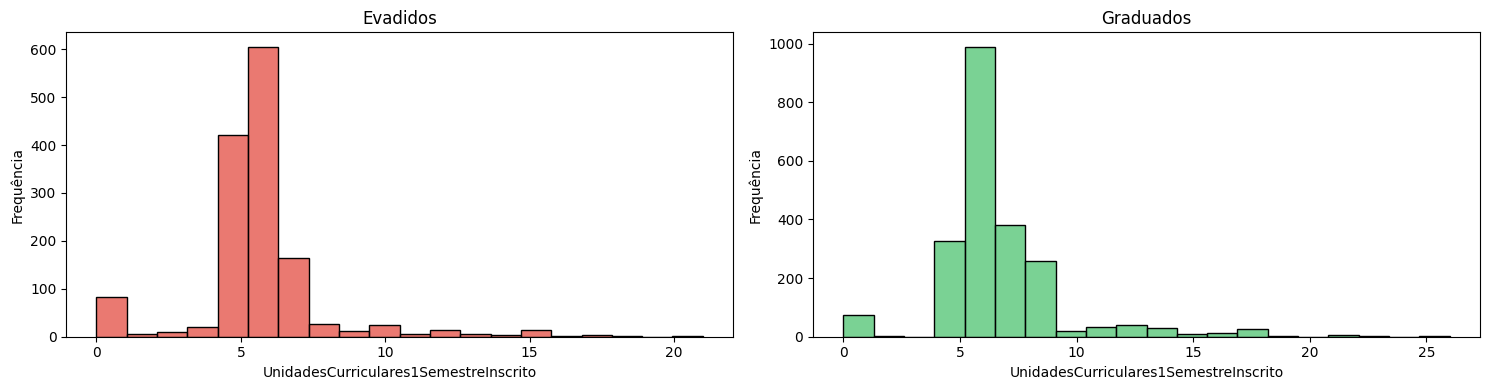

In [45]:
evadidos = df_evadidos['UnidadesCurriculares1SemestreInscrito']
graduados = df_graduados['UnidadesCurriculares1SemestreInscrito']

#Configurando para criar dois gráficos um do lado do outro.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o primeiro gráfico
sns.histplot(data=evadidos, bins=20, ax=axes[0], color='#e34c42')
axes[0].set_title('Evadidos')
axes[0].set_xlabel('UnidadesCurriculares1SemestreInscrito')
axes[0].set_ylabel('Frequência')

#Criando o segundo gráfico
sns.histplot(data=graduados, bins=20, ax=axes[1], color='#4dc471')
axes[1].set_title('Graduados')
axes[1].set_xlabel('UnidadesCurriculares1SemestreInscrito')
axes[1].set_ylabel('Frequência')

#Ajustando o espaçamento entre os gráficos e mostrando em nossa tela
fig.tight_layout()
plt.show()

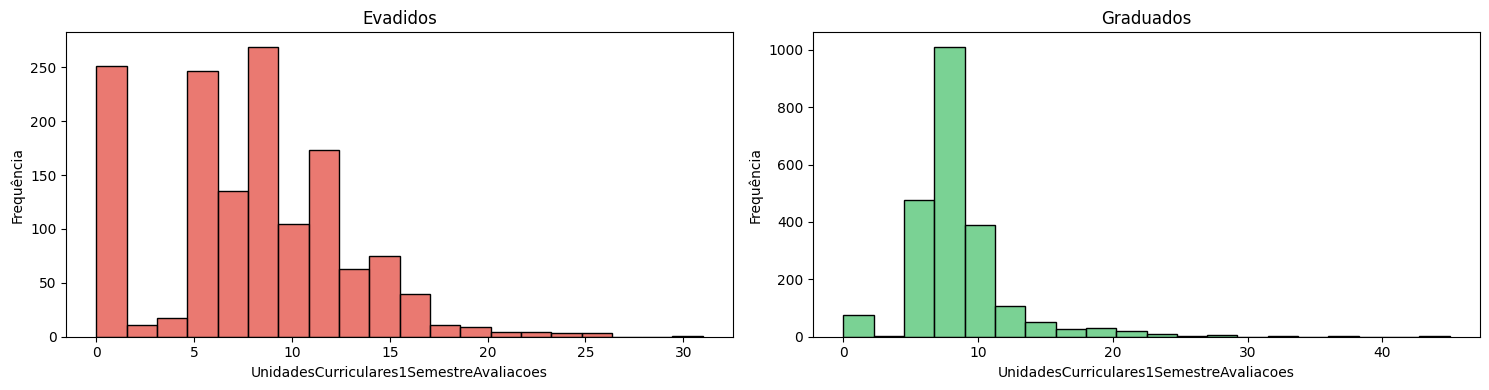

In [46]:
evadidos = df_evadidos['UnidadesCurriculares1SemestreAvaliacoes']
graduados = df_graduados['UnidadesCurriculares1SemestreAvaliacoes']

#Configurando para criar dois gráficos um do lado do outro.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o primeiro gráfico
sns.histplot(data=evadidos, bins=20, ax=axes[0], color='#e34c42')
axes[0].set_title('Evadidos')
axes[0].set_xlabel('UnidadesCurriculares1SemestreAvaliacoes')
axes[0].set_ylabel('Frequência')

#Criando o segundo gráfico
sns.histplot(data=graduados, bins=20, ax=axes[1], color='#4dc471')
axes[1].set_title('Graduados')
axes[1].set_xlabel('UnidadesCurriculares1SemestreAvaliacoes')
axes[1].set_ylabel('Frequência')

#Ajustando o espaçamento entre os gráficos e mostrando em nossa tela
fig.tight_layout()
plt.show()

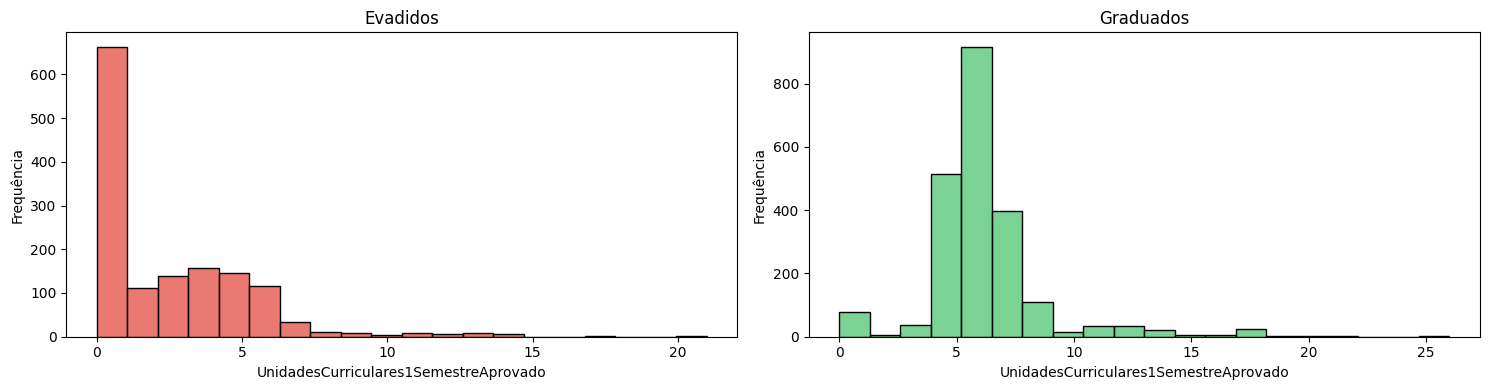

In [47]:
evadidos = df_evadidos['UnidadesCurriculares1SemestreAprovado']
graduados = df_graduados['UnidadesCurriculares1SemestreAprovado']

#Configurando para criar dois gráficos um do lado do outro.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o primeiro gráfico
sns.histplot(data=evadidos, bins=20, ax=axes[0], color='#e34c42')
axes[0].set_title('Evadidos')
axes[0].set_xlabel('UnidadesCurriculares1SemestreAprovado')
axes[0].set_ylabel('Frequência')

#Criando o segundo gráfico
sns.histplot(data=graduados, bins=20, ax=axes[1], color='#4dc471')
axes[1].set_title('Graduados')
axes[1].set_xlabel('UnidadesCurriculares1SemestreAprovado')
axes[1].set_ylabel('Frequência')

#Ajustando o espaçamento entre os gráficos e mostrando em nossa tela
fig.tight_layout()
plt.show()

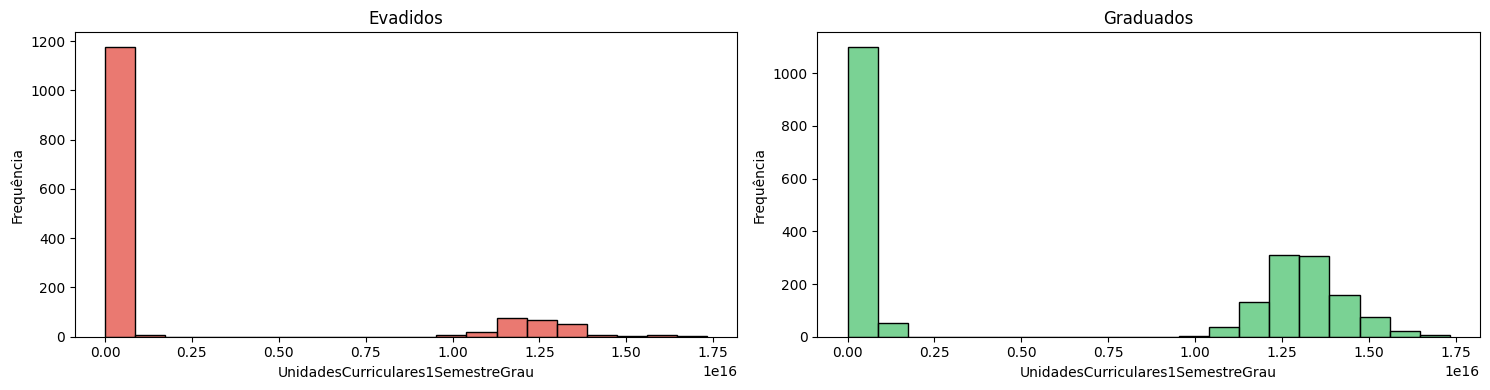

In [48]:
evadidos = df_evadidos['UnidadesCurriculares1SemestreGrau']
graduados = df_graduados['UnidadesCurriculares1SemestreGrau']

#Configurando para criar dois gráficos um do lado do outro.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o primeiro gráfico
sns.histplot(data=evadidos, bins=20, ax=axes[0], color='#e34c42')
axes[0].set_title('Evadidos')
axes[0].set_xlabel('UnidadesCurriculares1SemestreGrau')
axes[0].set_ylabel('Frequência')

#Criando o segundo gráfico
sns.histplot(data=graduados, bins=20, ax=axes[1], color='#4dc471')
axes[1].set_title('Graduados')
axes[1].set_xlabel('UnidadesCurriculares1SemestreGrau')
axes[1].set_ylabel('Frequência')

#Ajustando o espaçamento entre os gráficos e mostrando em nossa tela
fig.tight_layout()
plt.show()

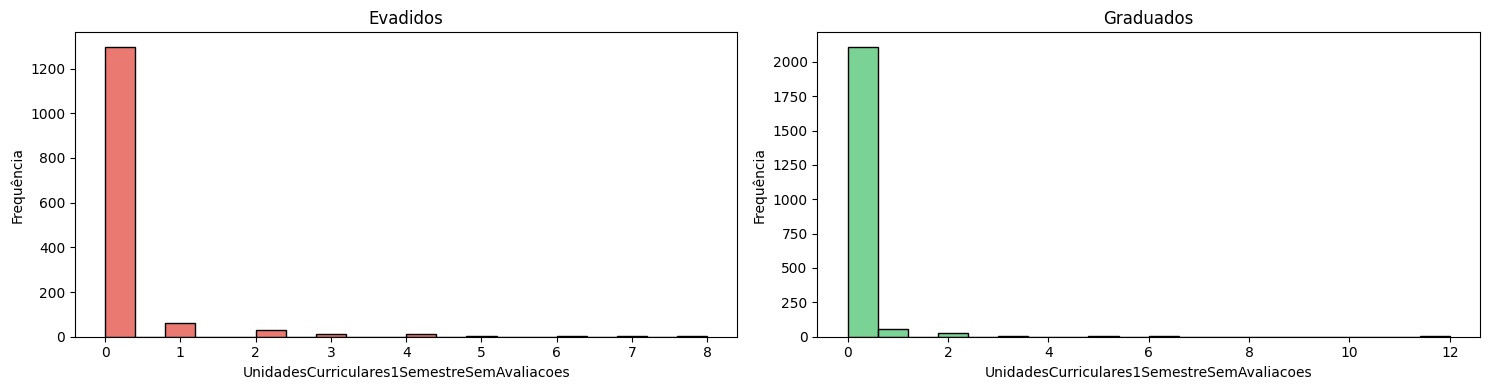

In [49]:
evadidos = df_evadidos['UnidadesCurriculares1SemestreSemAvaliacoes']
graduados = df_graduados['UnidadesCurriculares1SemestreSemAvaliacoes']

#Configurando para criar dois gráficos um do lado do outro.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o primeiro gráfico
sns.histplot(data=evadidos, bins=20, ax=axes[0], color='#e34c42')
axes[0].set_title('Evadidos')
axes[0].set_xlabel('UnidadesCurriculares1SemestreSemAvaliacoes')
axes[0].set_ylabel('Frequência')

#Criando o segundo gráfico
sns.histplot(data=graduados, bins=20, ax=axes[1], color='#4dc471')
axes[1].set_title('Graduados')
axes[1].set_xlabel('UnidadesCurriculares1SemestreSemAvaliacoes')
axes[1].set_ylabel('Frequência')

#Ajustando o espaçamento entre os gráficos e mostrando em nossa tela
fig.tight_layout()
plt.show()

Observamos que as variáveis acadêmicas que possuem grande diferença entre as distribuições dos grupos evadidos e formandos está entre as notas:

* UnidadesCurricularesSemestreAvaliacoes

* UnidadesCurricularesSemestreAprovado

* UnidadesCurricularesSemestreGrau

Vamos validar algumas hipóteses?

# **Teste de hipótese: saindo do achismo!**  🤷

In [50]:
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
import scipy.stats as stats

Aqui vamos testar de forma estatística o quanto duas amostras de dados são diferentes. No caso, queremos validar a seguinte hipótese:

*O número de aprovações do 1º semestre para evadidos são menores do que para formandos?*


* **H0 (Hipótese Nula):**
O número de aprovações no 1º semestre para evadidos é igual ou maior do que o número de aprovações para formandos.

* **H1 (Hipótese Alternativa):**
O número de aprovações no 1º semestre para evadidos é menor do que o número de aprovações para formandos.


Queremos testar se nossa hipótese alternativa está tem significancia estatística!





Como validar se duas distribuições são iguais?

- **1º passo:** verificar se a amostra é normal ( Shapiro-Wilk é uma técnica estatística utilizada para verificar se uma determinada amostra de dados segue uma distribuição normal)

- **2º passo:** Aplicar teste de hipótese de métodos não paramétricos.


**UnidadesCurricularesSemestreAprovado**

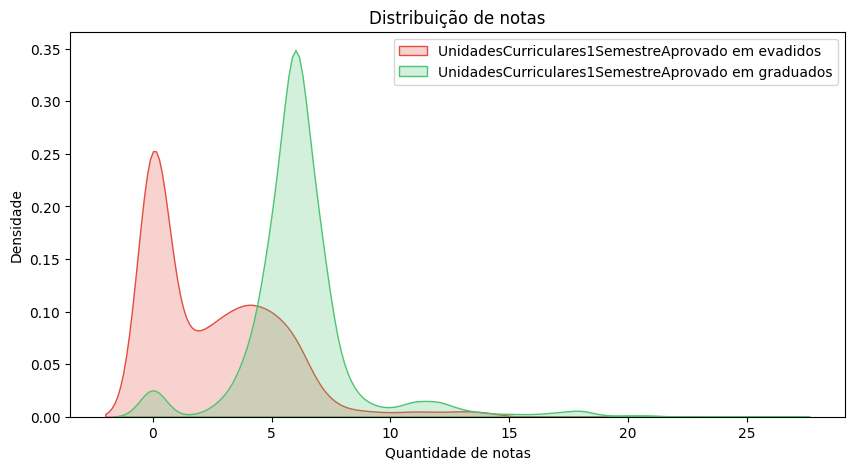

In [51]:
evadidos = df_evadidos['UnidadesCurriculares1SemestreAprovado']
graduados = df_graduados['UnidadesCurriculares1SemestreAprovado']

#Uma outra forma de visualizarmos a distruibuição da frequência dos valores é criando um gráfico de densidade.
plt.figure(figsize=(10, 5))

#Criando o gráfico de densidade usando ambos dataframes
sns.kdeplot(data=evadidos, label='UnidadesCurriculares1SemestreAprovado em evadidos', fill=True)
sns.kdeplot(data=graduados, label='UnidadesCurriculares1SemestreAprovado em graduados', fill=True)

plt.title('Distribuição de notas')
plt.xlabel('Quantidade de notas')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [52]:
stat, p = shapiro(graduados)
print("Estatística de teste: {:.4f}, valor p: {}".format(stat, p))

if p > 0.05:
  print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
  print("A hipótese de normalidade é rejeitada")

Estatística de teste: 0.7501, valor p: 0.0
A hipótese de normalidade é rejeitada


In [53]:
stat, p = shapiro(evadidos)
print("Estatística de teste: {:.4f}, valor p: {}".format(stat, p))

if p > 0.05:
  print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
  print("A hipótese de normalidade é rejeitada")

Estatística de teste: 0.8238, valor p: 6.84395963638275e-37
A hipótese de normalidade é rejeitada


In [54]:
stat, p = mannwhitneyu(evadidos.sample(len(evadidos)), graduados.sample(len(graduados)), alternative="less")

print("Estatísica de teste U: ", stat)
print("Valor p: ", p)

alpha = 0.05
if p < alpha:
  print("Diferença estatisticamente significante")
else:
  print("Não há dieferença estatisticamente significante")

Estatísica de teste U:  444728.0
Valor p:  3.729804012571768e-302
Diferença estatisticamente significante


A ideia aqui é explorar as nossas hipóteses criada sobre os dados e comprovar de forma estatística que os grupos de estudantes são diferentes!

# **Separando os dados em treinamento e teste** 📊

In [69]:
df_evadidos = df[df['Target'] == 'Desistente']
df_matriculados = df[df['Target'] == 'Matriculado']
df_graduados = df[df['Target'] == 'Graduado']

df_concatenado = pd.concat([df_evadidos, df_graduados])

set(df_concatenado['Target'])

{'Desistente', 'Graduado'}

In [71]:
from sklearn.model_selection import train_test_split

SEED = 42

train_df, test_df = train_test_split(df_concatenado, test_size=0.2, random_state=SEED)

train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [72]:
round(train_df['Target'].value_counts(normalize = True)*100,2)

Graduado      61.43
Desistente    38.57
Name: Target, dtype: float64

In [73]:
round(test_df['Target'].value_counts(normalize = True)*100,2)

Graduado      58.54
Desistente    41.46
Name: Target, dtype: float64

Como podemos observar, a base de treinamento e teste dos dados possui maior concentração de amostras para os estudantes graduados, o que pode ser um comportamento natural em faculdades, mas será que este problema de desequilíbrio pode afetar o aprendizado de máquina? Claramente, sim! O desequilíbrio de classes é um problema muito comum neste mundo de aprendizado de máquina e pode ser tratado de vários jeitos:

* Coleta de mais amostras das classes minoritárias.
* Aplicação de técnica de oversampling.

Neste notebook, vamos trabalhar com a segunda opção.

# **Configurando a pipeline dos dados** 🚀

*O que seria pipeline?*

Podemos definir a pipeline como uma **sequência de de processos ou etapas encadeadas que são usadas para preparar, treinar e avaliar modelos de machine learning/ deep learning**. Um pipeline é uma abordagem organizada que facilita o gerenciamento de todas as etapas necessárias na construção e implementação de um modelo de aprendizado de máquina.

A ideia é utilizarmo a biblioteca do scikit-learn para automarizar estes fluxos de tratamento de dados.

Vamos trabalhar com algumas classes do scikit-learn, como:

* **BaseEstimator:** BaseEstimator é uma classe base do scikit-learn que fornece a funcionalidade básica para todos os estimadores (modelos) do scikit-learn. Define métodos como **fit()** e **predict()**. Os modelos de machine learning personalizados geralmente herdam dessa classe para garantir uma interface consistente.


* **TransformerMixin:** TransformerMixin é uma classe do scikit-learn que fornece funcionalidades adicionais para **transformadores** (pré-processadores de dados). Adiciona métodos como fit_transform() que combina as etapas de ajuste (fit()) e transformação (transform()) em um único método.


* **MinMaxScaler:** MinMaxScaler é uma classe do scikit-learn que realiza a **normalização** de características, escalando-as para um intervalo específico, geralmente entre **0 e 1**. Isso é útil para algoritmos sensíveis à escala das características.

* **OrdinalEncoder**: OrdinalEncoder **converte variáveis categóricas em números de forma ordinal com base na ordem das categorias**. Útil quando existe uma ordem intrínseca nas categorias.

* **LabelEncoder:** LabelEncoder, do scikit-learn, é usado para **codificar rótulos de classes em números inteiros**. É frequentemente usado quando se trabalha com algoritmos de aprendizado supervisionado que requerem rótulos numéricos.


* **SMOTE (Synthetic Minority Over-sampling Technique) do imbalanced-learn (imblearn):** SMOTE é uma técnica de **oversampling** para lidar com conjuntos de dados desequilibrados. Ele cria exemplos sintéticos da classe minoritária, aumentando sua representação, a fim de **equilibrar a distribuição de classes e melhorar o desempenho de modelos de machine learning em casos de desequilíbrio de classe**.


In [55]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

In [56]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        Inicializa a instância da classe.

        Parâmetros:
        - columns: Lista de nomes de colunas a serem codificadas.
        """
        self.columns = columns
        self.label_encoders = {}

    def fit(self, X, y=None):
        """
        Ajusta os codificadores de rótulos com base nos dados de entrada.

        Parâmetros:
        - X: Os dados de entrada.
        - y: Não é utilizado neste caso.

        Retorna:
        - A própria instância da classe.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column in self.columns:
            # Cria um novo LabelEncoder
            le = LabelEncoder()
            # Ajusta o LabelEncoder aos valores únicos dessa coluna
            le.fit(X_copy[column])
            # Armazena o LabelEncoder no dicionário label_encoders
            self.label_encoders[column] = le

        # Retorna a própria instância da classe
        return self

    def transform(self, X):
        """
        Transforma os dados de entrada usando os codificadores de rótulos previamente ajustados.

        Parâmetros:
        - X: Os dados de entrada a serem transformados.

        Retorna:
        - Os dados transformados.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column, le in self.label_encoders.items():
            # Substitui os valores dessa coluna pelos valores codificados
            X_copy[column] = le.transform(X_copy[column])

        # Retorna os dados transformados
        return X_copy

In [57]:
class CustomMinMaxScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        Inicializa a instância da classe.

        Parâmetros:
        - columns: Lista de nomes de colunas a serem escalonadas.
        """
        self.columns = columns
        self.scalers = {}

    def fit(self, X, y=None):
        """
        Ajusta os escalonadores com base nos dados de entrada.

        Parâmetros:
        - X: Os dados de entrada.
        - y: Não é utilizado neste caso.

        Retorna:
        - A própria instância da classe.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column in self.columns:
            # Cria um novo MinMaxScaler
            scaler = MinMaxScaler()
            # Ajusta o MinMaxScaler aos valores dessa coluna
            scaler.fit(X_copy[[column]])
            # Armazena o MinMaxScaler no dicionário scalers
            self.scalers[column] = scaler

        # Retorna a própria instância da classe
        return self

    def transform(self, X):
        """
        Transforma os dados de entrada usando os escalonadores previamente ajustados.

        Parâmetros:
        - X: Os dados de entrada a serem transformados.

        Retorna:
        - Os dados transformados.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column, scaler in self.scalers.items():
            # Substitui os valores dessa coluna pelos valores escalonados
            X_copy[column] = scaler.transform(X_copy[[column]])

        # Retorna os dados transformados
        return X_copy

In [58]:
class CustomOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        Inicializa a instância da classe.

        Parâmetros:
        - columns: Lista de nomes de colunas a serem codificadas de forma ordinal.
        """
        self.columns = columns
        self.ordinal_encoders = {}

    def fit(self, X, y=None):
        """
        Ajusta os codificadores ordinais com base nos dados de entrada.

        Parâmetros:
        - X: Os dados de entrada.
        - y: Não é utilizado neste caso.

        Retorna:
        - A própria instância da classe.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column in self.columns:
            # Cria um novo OrdinalEncoder
            ordinal_encoder = OrdinalEncoder()
            # Ajusta o OrdinalEncoder aos valores dessa coluna
            ordinal_encoder.fit(X_copy[[column]])
            # Armazena o OrdinalEncoder no dicionário ordinal_encoders
            self.ordinal_encoders[column] = ordinal_encoder

        # Retorna a própria instância da classe
        return self

    def transform(self, X):
        """
        Transforma os dados de entrada usando os codificadores ordinais previamente ajustados.

        Parâmetros:
        - X: Os dados de entrada a serem transformados.

        Retorna:
        - Os dados transformados.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column, ordinal_encoder in self.ordinal_encoders.items():
            # Substitui os valores dessa coluna pelos valores codificados de forma ordinal
            X_copy[column] = ordinal_encoder.transform(X_copy[[column]])

        # Retorna os dados transformados
        return X_copy

In [59]:
class Oversample(BaseEstimator, TransformerMixin):
    def __init__(self):
        """
        Inicializa a instância da classe.
        """
        pass

    def fit(self, df):
        """
        Método de ajuste (não utilizado neste caso).

        Parâmetros:
        - df: O DataFrame de entrada.

        Retorna:
        - A própria instância da classe.
        """
        return self

    def transform(self, df):
        """
        Transforma os dados de entrada aplicando a técnica de oversampling (SMOTE).

        Parâmetros:
        - df: O DataFrame de entrada.

        Retorna:
        - O DataFrame com oversampling aplicado, se a coluna 'Target' estiver presente.
          Caso contrário, retorna o DataFrame original sem alterações.
        """
        if 'Target' in df.columns:
            # Instancia um objeto SMOTE para realizar oversampling na classe minoritária
            oversample = SMOTE(sampling_strategy='minority')
            # Aplica o SMOTE aos dados
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'Target'], df['Target'])
            # Combina os dados transformados em um novo DataFrame
            df_bal = pd.concat([pd.DataFrame(X_bal), pd.DataFrame(y_bal)], axis=1)
            return df_bal
        else:
            # Se a coluna 'Target' não estiver presente, imprime uma mensagem e retorna o DataFrame original
            print("O target não está no DataFrame")
            return df

Criando a pipeline:

In [60]:
from sklearn.pipeline import Pipeline

def pipeline(df):

    pipeline = Pipeline([
        ('label_encoder', CustomLabelEncoder(columns=['EstadoCivil', 'Curso', 'Nacionalidade', 'Genero', 'Target'])),
        ('min_max', CustomMinMaxScaler(columns=['QualificacaoAnteriorGrau', 'NotaAdmissao', 'UnidadesCurriculares1SemestreCreditado', 'UnidadesCurriculares1SemestreInscrito',
                                                'UnidadesCurriculares1SemestreAvaliacoes', 'UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreGrau',
                                                'UnidadesCurriculares1SemestreSemAvaliacoes', 'UnidadesCurriculares2SemestreCreditado', 'UnidadesCurriculares2SemestreInscrito',
                                                'UnidadesCurriculares2SemestreAvaliacoes', 'UnidadesCurriculares2SemestreAprovado', 'UnidadesCurriculares2SemestreGrau',
                                                'UnidadesCurriculares2SemestreSemAvaliacoes', 'TaxaDesemprego', 'TaxaInflacao', 'PIB'])),
        ('ordinal_fearure', CustomOrdinalEncoder(columns=['QualificacaoAnterior'])),
        ('oversample', Oversample())
    ])
    df_pipeline = pipeline.fit_transform(df)
    return df_pipeline

Dados antes da pipeline:

In [74]:
train_df.head(3)

,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
3003,Solteiro,Higiene Oral,Ensino Secundário,126.0,Português,119.0,0,0,1,Feminino,1,0,0,7,8,7,1.214286e+16,0,0,8,8,8,1.337500e+04,0,16.2,0.3,-0.92,Desistente
4339,Solteiro,Enfermagem,Ensino Secundário,100.0,Português,130.0,0,0,1,Feminino,0,0,0,14,14,12,1.329167e+16,1,0,14,14,12,1.329167e+16,1,7.6,2.6,0.32,Graduado
4337,Solteiro,Enfermagem Veterinária,Ensino Secundário,125.0,Português,114.5,0,0,1,Feminino,0,0,0,5,6,5,1.300000e+01,1,0,5,9,4,1.325000e+01,0,12.7,3.7,-1.70,Graduado


Dados depois da pipeline:

In [75]:
train = pipeline(train_df)
test = pipeline(test_df)

In [77]:
train.head(3)

,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
0,3,11,8.0,0.333333,11,0.252632,0,0,1,0,1,0,0.0,0.269231,0.177778,0.269231,7.005495e-01,0.0,0.0,0.347826,0.296296,0.4,7.550403e-13,0.000000,1.000000,0.244444,0.414795,0
1,3,3,8.0,0.053763,11,0.368421,0,0,1,0,0,0,0.0,0.538462,0.311111,0.461538,7.668269e-01,0.1,0.0,0.608696,0.518519,0.6,7.503360e-01,0.083333,0.000000,0.755556,0.578600,1
2,3,4,8.0,0.322581,11,0.205263,0,0,1,0,0,0,0.0,0.192308,0.133333,0.192308,7.500000e-16,0.1,0.0,0.217391,0.333333,0.2,7.479839e-16,0.000000,0.593023,1.000000,0.311757,1


# **Por que aplicamos as normalizações e tratamento dos dados com as bases já separadas em treino e teste?** 🤔

Se aplicarmos normalizações ou qualquer tipo de tratamento nos dados antes de dividir em conjuntos de treino e teste, podemos acabar **introduzindo informações do conjunto de teste no conjunto de treino**. Isso pode levar a uma avaliação otimista do desempenho do modelo, uma vez que o modelo terá visto parte dos dados de teste durante o treinamento. Este tipo de problema também é chamado de *Data Leak* (vazamento de dados).

# **Avaliando os resultados do oversampling**




In [78]:
round(train['Target'].value_counts(normalize = True)*100,2)

0    50.0
1    50.0
Name: Target, dtype: float64

In [79]:
round(test['Target'].value_counts(normalize = True)*100,2)

0    50.0
1    50.0
Name: Target, dtype: float64

# **Análise de correlação das características**

<Axes: >

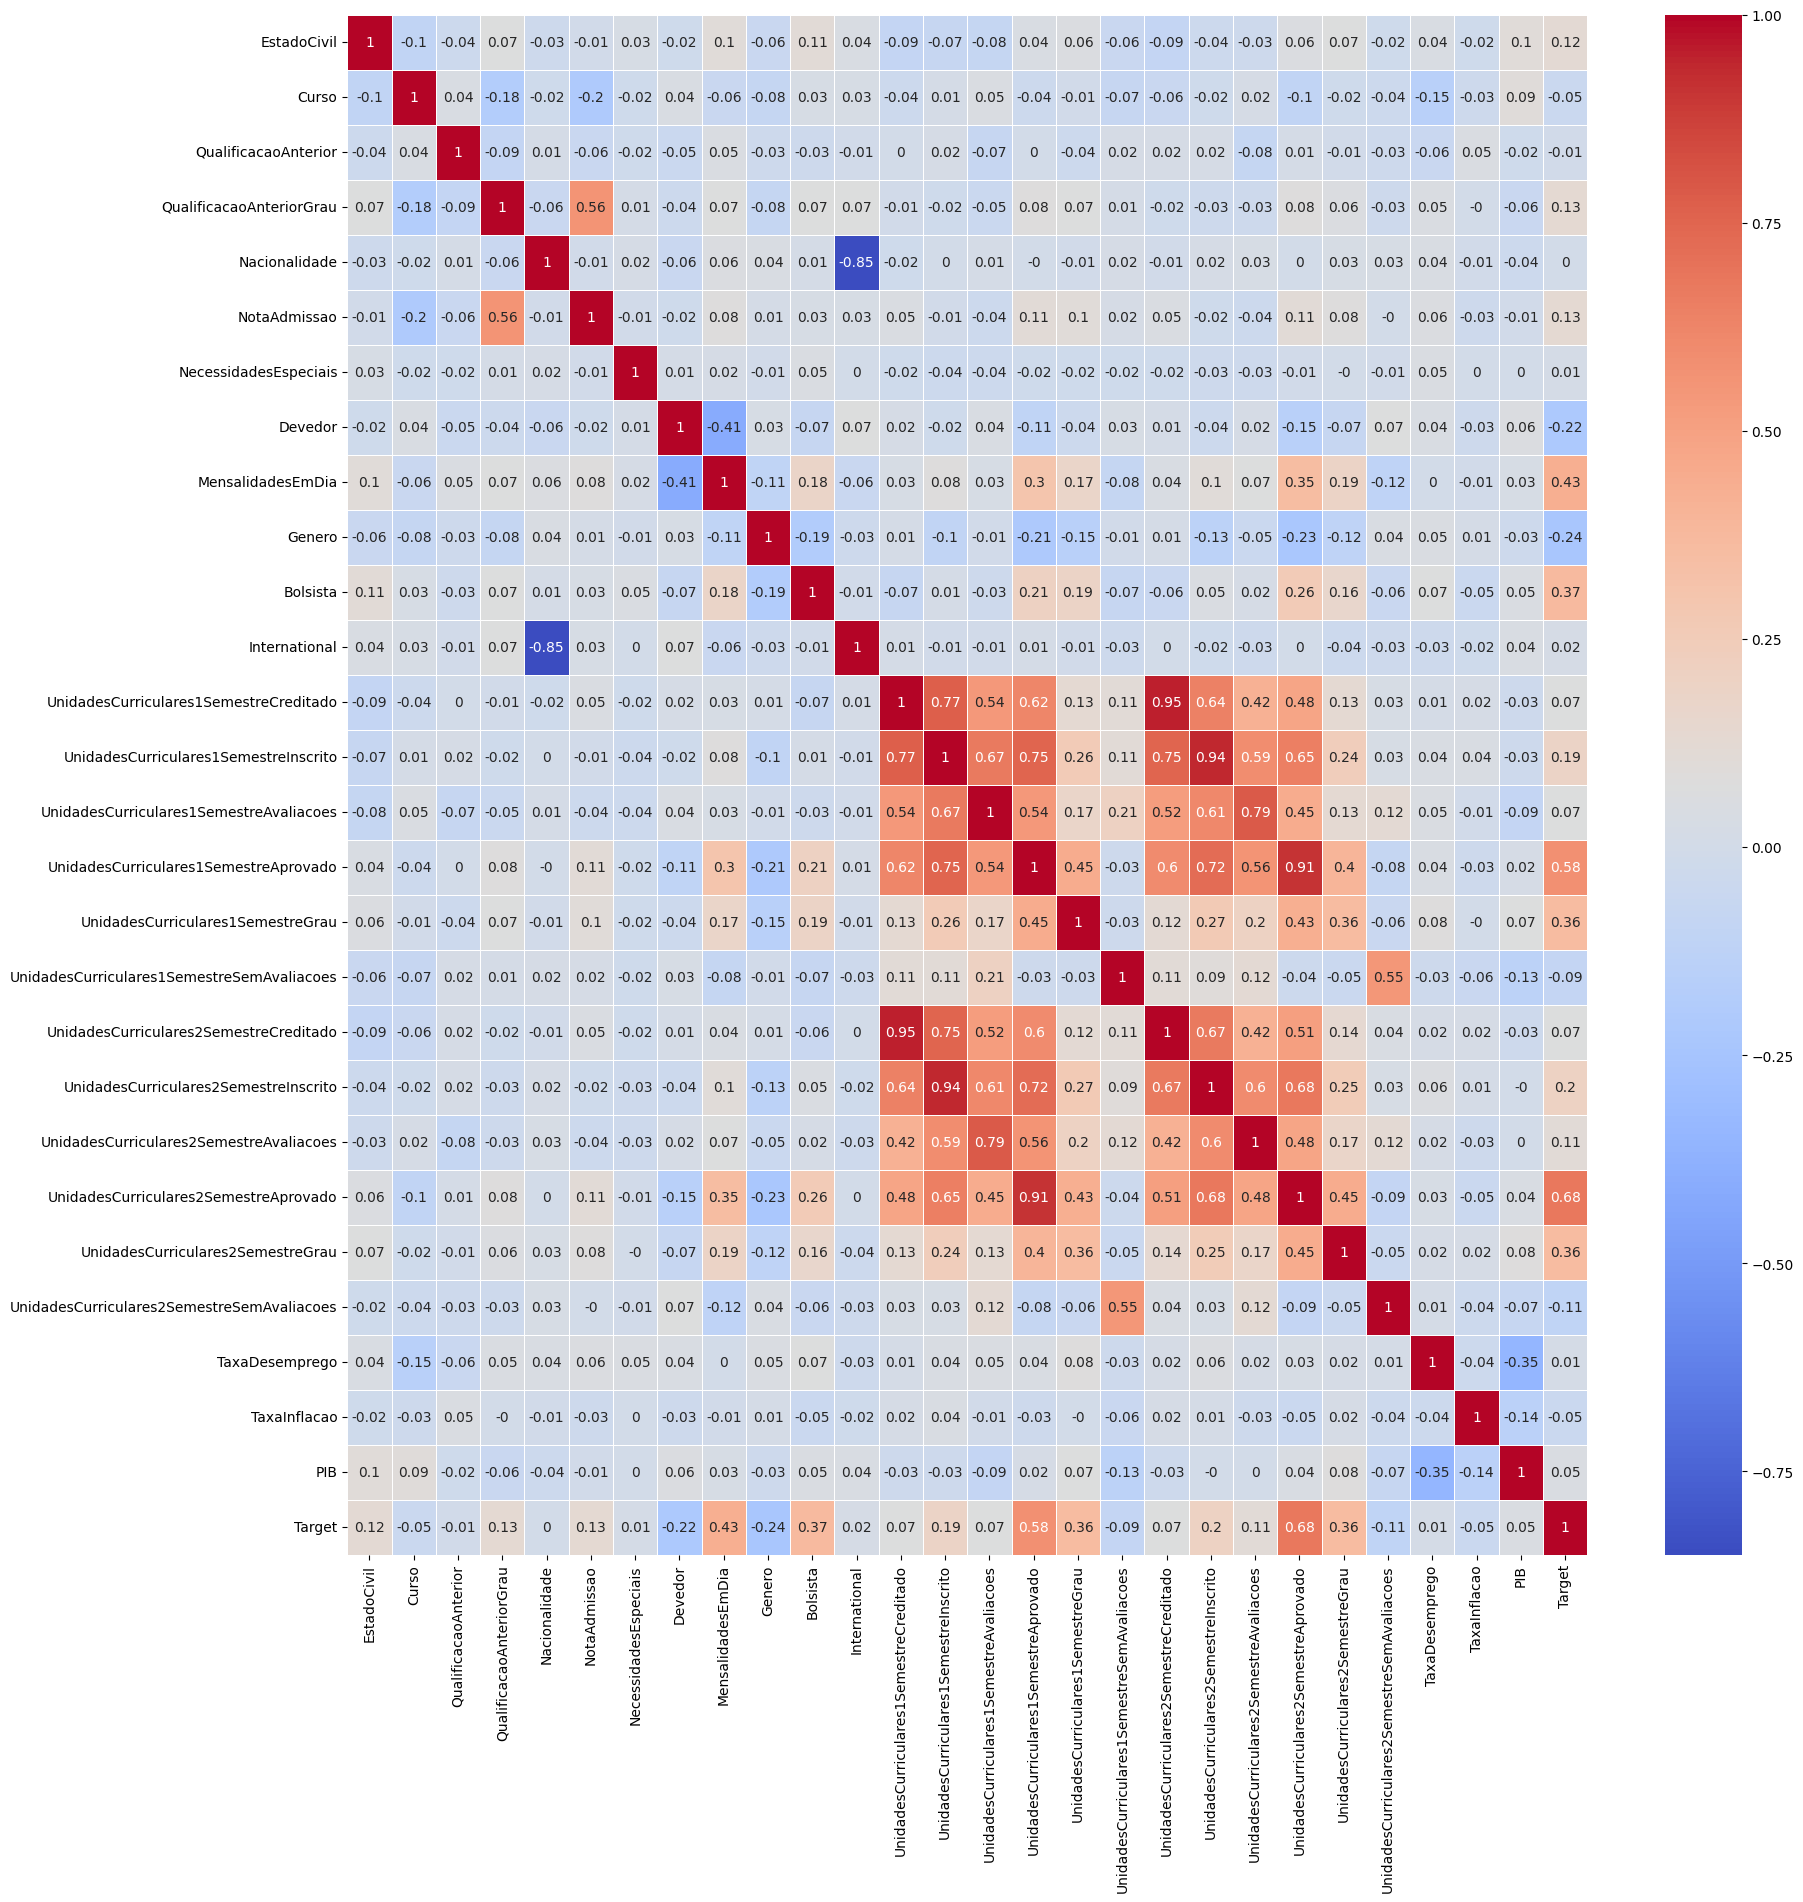

In [80]:
correlation_matrix = train.corr().round(2)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

# **Preparando a base para treino e validação do modelo** 🛠️

In [82]:
X_train, y_train = train.loc[:, train.columns != 'Target'], train['Target']
X_test, y_test= test.loc[:, test.columns != 'Target'], test['Target']

In [83]:
X_train.shape

(3568, 27)

In [85]:
y_train.shape

(3568,)

Vamos criar uma função que vai executar o modelo preditivo e avaliar a sua performance utilizando as principais métricas de validação.

In [87]:

def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando modelo com os dados de treino
    modelo.fit(X_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

    print("\nRoc Curve\n")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)


------------------------------Resultados LogisticRegression()------------------------------

AUC 0.9585162629757786

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       425
           1       0.87      0.95      0.91       425

    accuracy                           0.91       850
   macro avg       0.91      0.91      0.91       850
weighted avg       0.91      0.91      0.91       850


Roc Curve



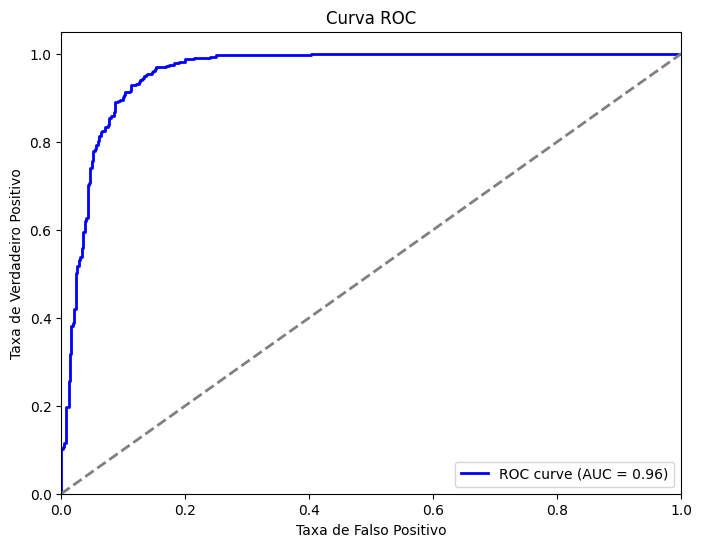

In [88]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)